In [1]:
# Import required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
import os
from PIL import Image

In [2]:
# Load the trained license plate detection model
model_path = "./runs/detect/license_plate_detection_n12/weights/best.pt"
model = YOLO(model_path)
print(f"Model loaded successfully from: {model_path}")

Model loaded successfully from: ./runs/detect/license_plate_detection_n12/weights/best.pt


In [3]:
# Function to detect and visualize license plates
def detect_license_plates(image_path, model, conf_threshold=0.5):
    """
    Detect license plates in an image and display results
    
    Args:
        image_path: Path to the input image
        model: Loaded YOLO model
        conf_threshold: Confidence threshold for detections
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None
    
    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Run inference
    results = model(image, conf=conf_threshold)
    
    # Create a copy for drawing
    image_with_detections = image_rgb.copy()
    
    print(f"\nDetecting license plates in: {os.path.basename(image_path)}")
    print(f"Image size: {image.shape[1]}x{image.shape[0]}")
    
    detected_plates = []
    
    # Process detections
    for r in results:
        boxes = r.boxes
        if boxes is not None:
            for i, box in enumerate(boxes):
                # Get bounding box coordinates
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                confidence = box.conf[0].cpu().numpy()
                
                print(f"Detection {i+1}: Confidence = {confidence:.3f}")
                print(f"  Bounding box: ({x1}, {y1}) to ({x2}, {y2})")
                
                # Draw bounding box
                cv2.rectangle(image_with_detections, (x1, y1), (x2, y2), (0, 255, 0), 3)
                
                # Add confidence text
                label = f"License Plate: {confidence:.2f}"
                cv2.putText(image_with_detections, label, (x1, y1-10), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                
                # Extract the detected plate region
                plate_region = image_rgb[y1:y2, x1:x2]
                detected_plates.append({
                    'bbox': (x1, y1, x2, y2),
                    'confidence': confidence,
                    'plate_image': plate_region
                })
    
    # Display results
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Original image
    axes[0].imshow(image_rgb)
    axes[0].set_title(f"Original Image: {os.path.basename(image_path)}")
    axes[0].axis('off')
    
    # Image with detections
    axes[1].imshow(image_with_detections)
    axes[1].set_title(f"Detections: {len(detected_plates)} license plate(s) found")
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Display individual detected plates
    if detected_plates:
        print(f"\n📋 Detected {len(detected_plates)} license plate(s):")
        
        # Create subplot for detected plates
        cols = min(3, len(detected_plates))
        rows = (len(detected_plates) + cols - 1) // cols
        
        fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))
        if len(detected_plates) == 1:
            axes = [axes]
        elif rows == 1:
            axes = [axes]
        else:
            axes = axes.flatten()
        
        for i, plate_info in enumerate(detected_plates):
            if i < len(axes):
                axes[i].imshow(plate_info['plate_image'])
                axes[i].set_title(f"Plate {i+1} (Conf: {plate_info['confidence']:.3f})")
                axes[i].axis('off')
        
        # Hide unused subplots
        for i in range(len(detected_plates), len(axes)):
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("❌ No license plates detected with the given confidence threshold.")
    
    return detected_plates

🚗 Testing License Plate Detection Model

🎯 Testing with confidence threshold: 0.3
----------------------------------------

0: 384x640 1 0, 107.1ms
Speed: 5.5ms preprocess, 107.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

Detecting license plates in: N6.jpeg
Image size: 1920x1080
Detection 1: Confidence = 0.803
  Bounding box: (869, 617) to (1106, 667)


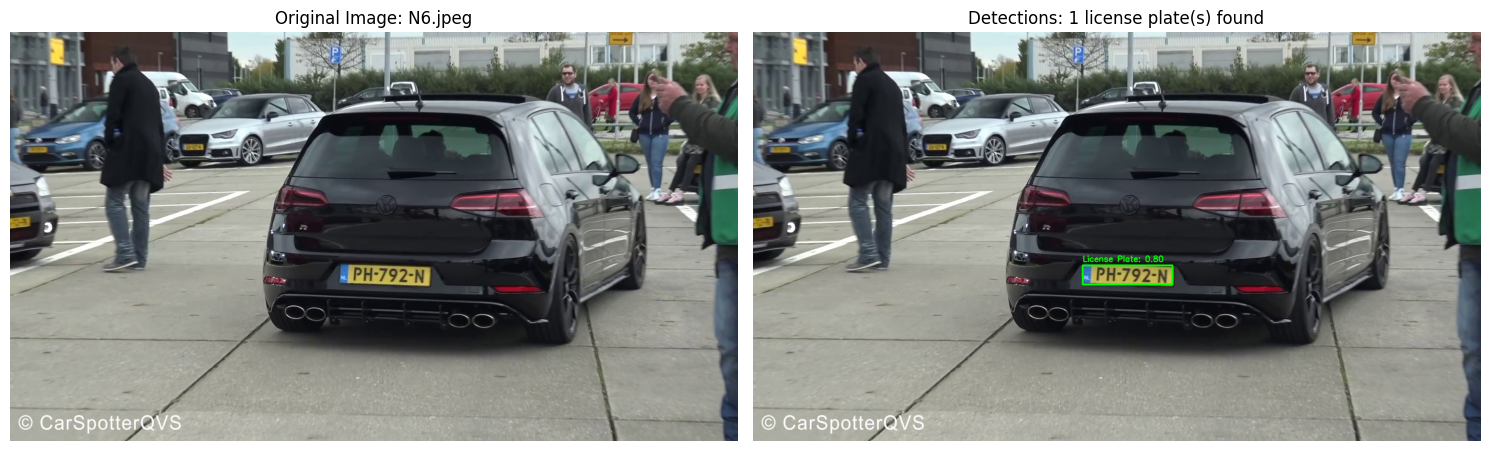


📋 Detected 1 license plate(s):


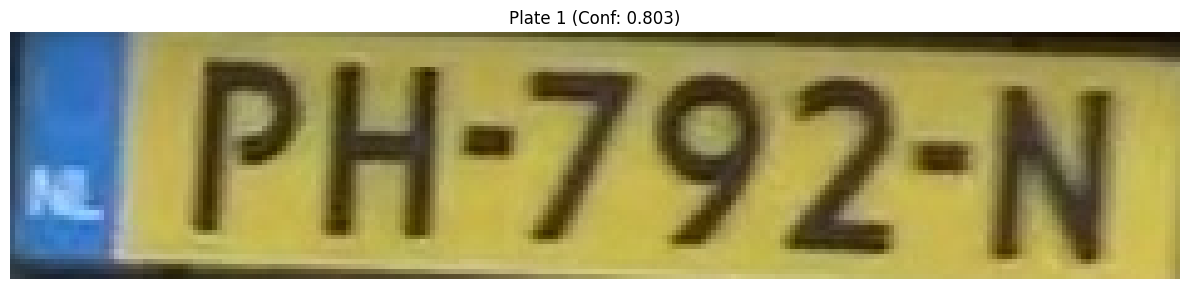

✅ Success! Found 1 license plate(s)
  Plate 1: Confidence 0.803, Size: 237x50

🎯 Testing with confidence threshold: 0.5
----------------------------------------

0: 384x640 1 0, 424.7ms
Speed: 35.2ms preprocess, 424.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

Detecting license plates in: N6.jpeg
Image size: 1920x1080
Detection 1: Confidence = 0.803
  Bounding box: (869, 617) to (1106, 667)


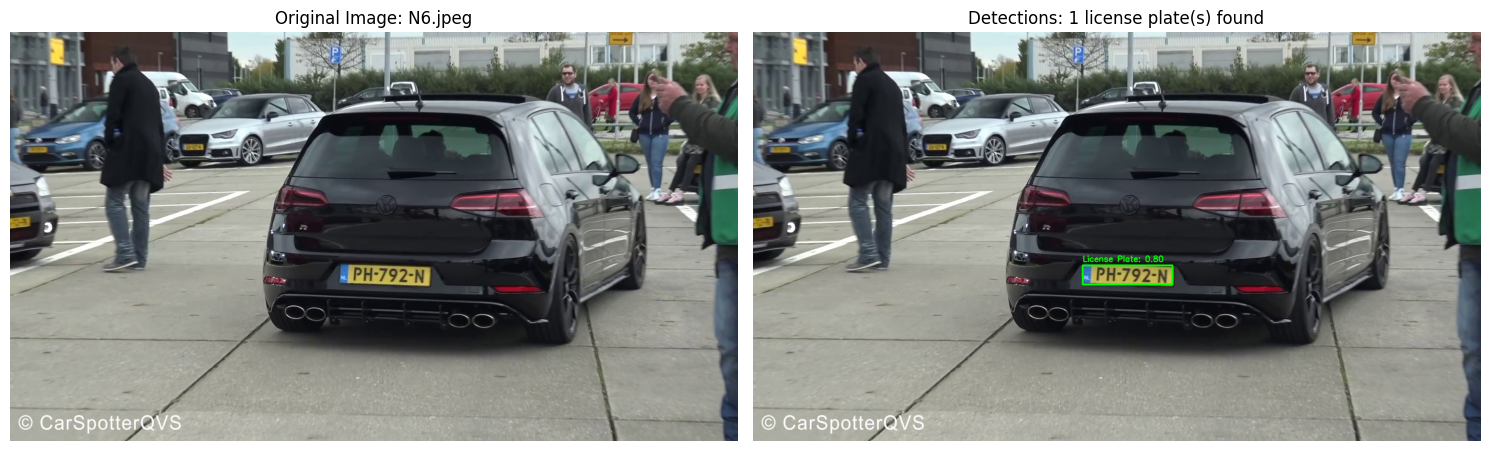


📋 Detected 1 license plate(s):


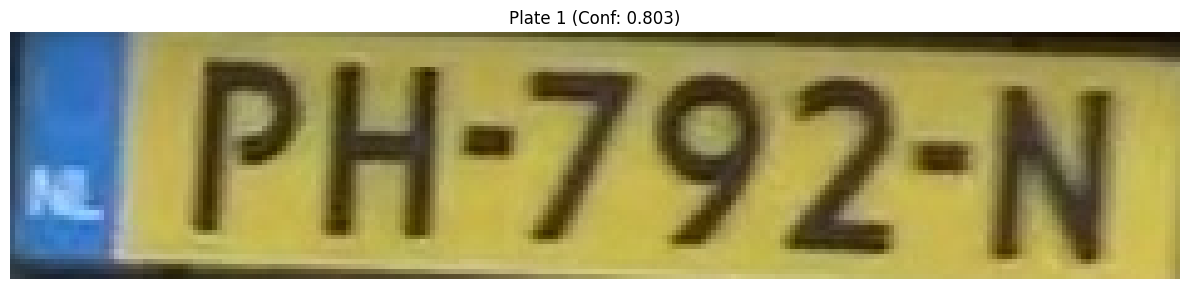

✅ Success! Found 1 license plate(s)
  Plate 1: Confidence 0.803, Size: 237x50

🎯 Testing with confidence threshold: 0.7
----------------------------------------

0: 384x640 1 0, 146.6ms
Speed: 9.8ms preprocess, 146.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

Detecting license plates in: N6.jpeg
Image size: 1920x1080
Detection 1: Confidence = 0.803
  Bounding box: (869, 617) to (1106, 667)


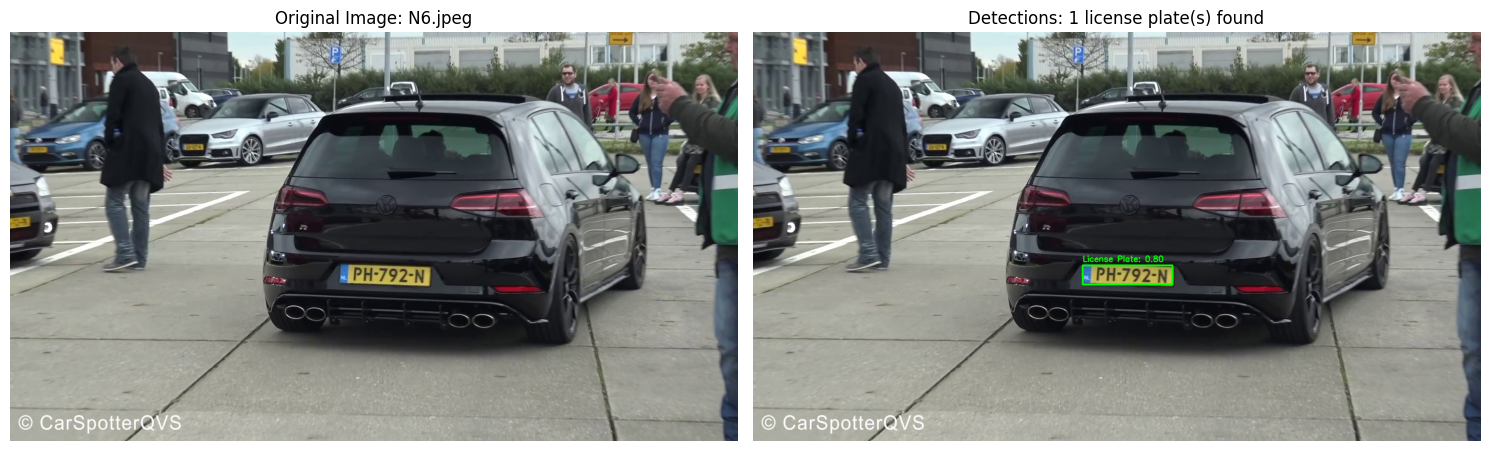


📋 Detected 1 license plate(s):


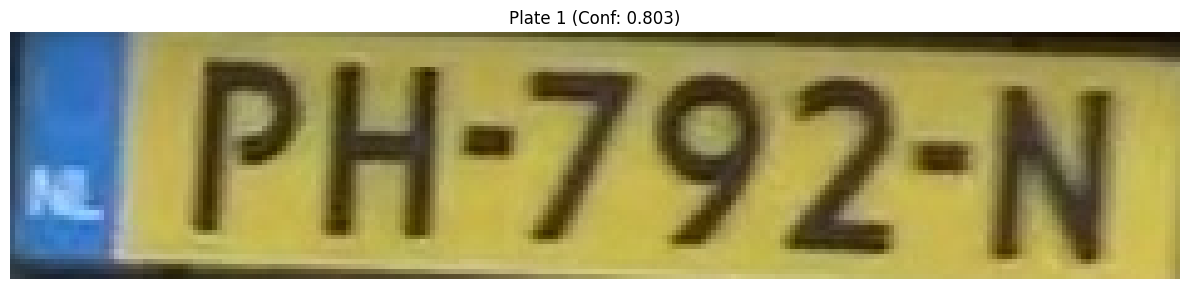

✅ Success! Found 1 license plate(s)
  Plate 1: Confidence 0.803, Size: 237x50


In [4]:
# Test the model on a sample image
test_image_path = "../data/images/N6.jpeg"  # You can change this to any image

print("🚗 Testing License Plate Detection Model")
print("=" * 50)

# Test with different confidence thresholds
confidence_thresholds = [0.3, 0.5, 0.7]

for conf in confidence_thresholds:
    print(f"\n🎯 Testing with confidence threshold: {conf}")
    print("-" * 40)
    
    detected_plates = detect_license_plates(test_image_path, model, conf_threshold=conf)
    
    if detected_plates:
        print(f"✅ Success! Found {len(detected_plates)} license plate(s)")
        for i, plate in enumerate(detected_plates):
            bbox = plate['bbox']
            print(f"  Plate {i+1}: Confidence {plate['confidence']:.3f}, Size: {bbox[2]-bbox[0]}x{bbox[3]-bbox[1]}")
    else:
        print(f"❌ No plates detected at confidence {conf}")